###  Collecting Data from YFinance

In [3]:
import yfinance as yf
import pandas as pd

# Define the tickers for the assets
tickers = ['TSLA', 'BND', 'SPY']

# Define the time period for data collection
start_date = '2015-01-01'
end_date = '2025-01-31'

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Save the data to CSV for further use
for ticker in tickers:
    data[ticker].to_csv(f'{ticker}_data.csv')

# Check the first few rows for TSLA as an example
data['TSLA'].head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


### Data Preprocessing

##### Load Data and Perform Data Cleaning

In [2]:
import os

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Move the files to the data directory
import shutil
for file in ['TSLA_data.csv', 'BND_data.csv', 'SPY_data.csv']:
    if os.path.exists(file):
        shutil.move(file, os.path.join('data', file))

In [15]:
import pandas as pd
import os

try:
    # Define the data directory path relative to the notebook location
    if os.path.exists('data'):  # If running from notebooks directory
        DATA_DIR = 'data'
    else:  # If running from project root
        DATA_DIR = os.path.join('notebooks', 'data')
    
    # Load each stock data file
    tsla_data = pd.read_csv(os.path.join(DATA_DIR, 'TSLA_data.csv'))
    bnd_data = pd.read_csv(os.path.join(DATA_DIR, 'BND_data.csv'))
    spy_data = pd.read_csv(os.path.join(DATA_DIR, 'SPY_data.csv'))
    
    # Process each dataframe to set the date index properly
    dfs = {
        'TSLA': tsla_data,
        'BND': bnd_data,
        'SPY': spy_data
    }
    
    for name, df in dfs.items():
        if 'Date' in df.columns:
            df.set_index(pd.to_datetime(df['Date']), inplace=True)
        elif 'Unnamed: 0' in df.columns:
            df.set_index(pd.to_datetime(df['Unnamed: 0']), inplace=True)
            df.index.name = 'Date'
            df.drop('Unnamed: 0', axis=1, inplace=True)
        print(f"\n{name} data loaded successfully!")
        print(f"{name} data shape:", df.shape)
        print(f"First few rows of {name} data:")
        print(df.head())
        print("\n" + "="*50)  # Separator for better readability

except FileNotFoundError as e:
    print("Error: One or more data files not found.")
    print("Current working directory:", os.getcwd())
    print("Trying to access files in:", os.path.abspath(DATA_DIR))
    print("\nPlease make sure the following files exist:")
    for file in ['TSLA_data.csv', 'BND_data.csv', 'SPY_data.csv']:
        print(f"- {os.path.join(DATA_DIR, file)}")
except Exception as e:
    print("An error occurred while loading the data:", str(e))
    print("Current working directory:", os.getcwd())


TSLA data loaded successfully!
TSLA data shape: (2537, 6)
First few rows of TSLA data:
        Price               Close                High                 Low  \
0      Ticker                TSLA                TSLA                TSLA   
1        Date                 NaN                 NaN                 NaN   
2  2015-01-02  14.620667457580566  14.883333206176758   14.21733283996582   
3  2015-01-05  14.005999565124512  14.433333396911621  13.810667037963867   
4  2015-01-06  14.085332870483398  14.279999732971191   13.61400032043457   

                 Open    Volume  
0                TSLA      TSLA  
1                 NaN       NaN  
2  14.857999801635742  71466000  
3  14.303333282470703  80527500  
4  14.003999710083008  93928500  


BND data loaded successfully!
BND data shape: (2537, 6)
First few rows of BND data:
        Price              Close                High                 Low  \
0      Ticker                BND                 BND                 BND   
1      

In [16]:
# Check for missing values
print(tsla_data.isnull().sum())
print(bnd_data.isnull().sum())
print(spy_data.isnull().sum())

# Fill missing values with interpolation (you can also use forward fill or backward fill)
tsla_data.fillna(method='ffill', inplace=True)
bnd_data.fillna(method='ffill', inplace=True)
spy_data.fillna(method='ffill', inplace=True)

# Check if missing values were handled
print(tsla_data.isnull().sum())
print(bnd_data.isnull().sum())
print(spy_data.isnull().sum())

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_53704/1685780560.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data.fillna(method='ffill', inplace=True)
/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_53704/1685780560.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data.fillna(method='ffill', inplace=True)
/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_53704/1685780560.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data.fillna(method='ffill', inplace=True)


### Exploratory Data Analysis (EDA)

##### Visualizing Closing Prices

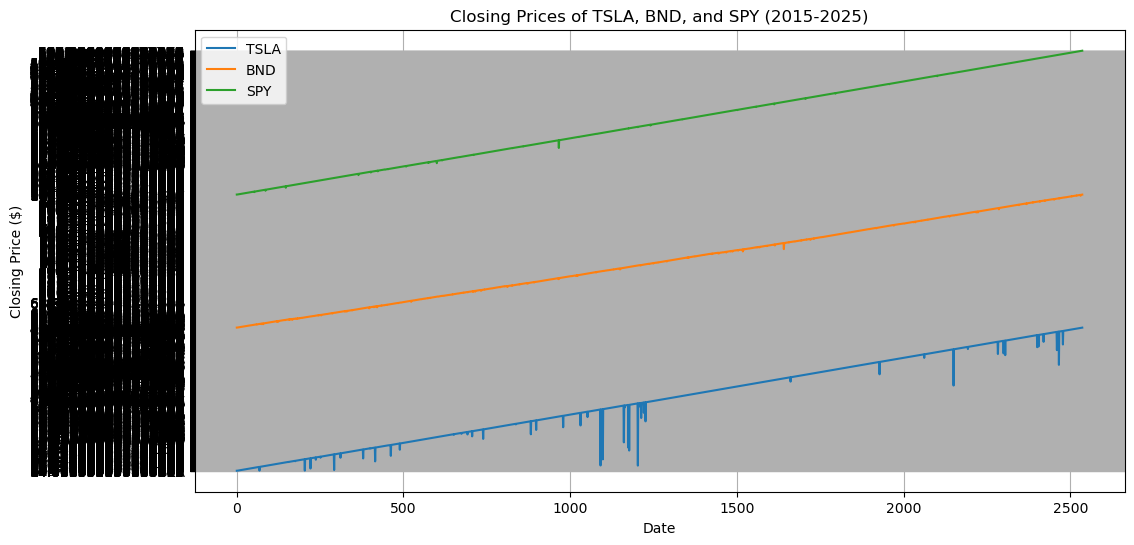

In [17]:
import matplotlib.pyplot as plt

# Plotting closing prices for all three assets
plt.figure(figsize=(12, 6))

plt.plot(tsla_data['Close'], label='TSLA')
plt.plot(bnd_data['Close'], label='BND')
plt.plot(spy_data['Close'], label='SPY')

plt.title('Closing Prices of TSLA, BND, and SPY (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

#####  Daily Percentage Change (Volatility)

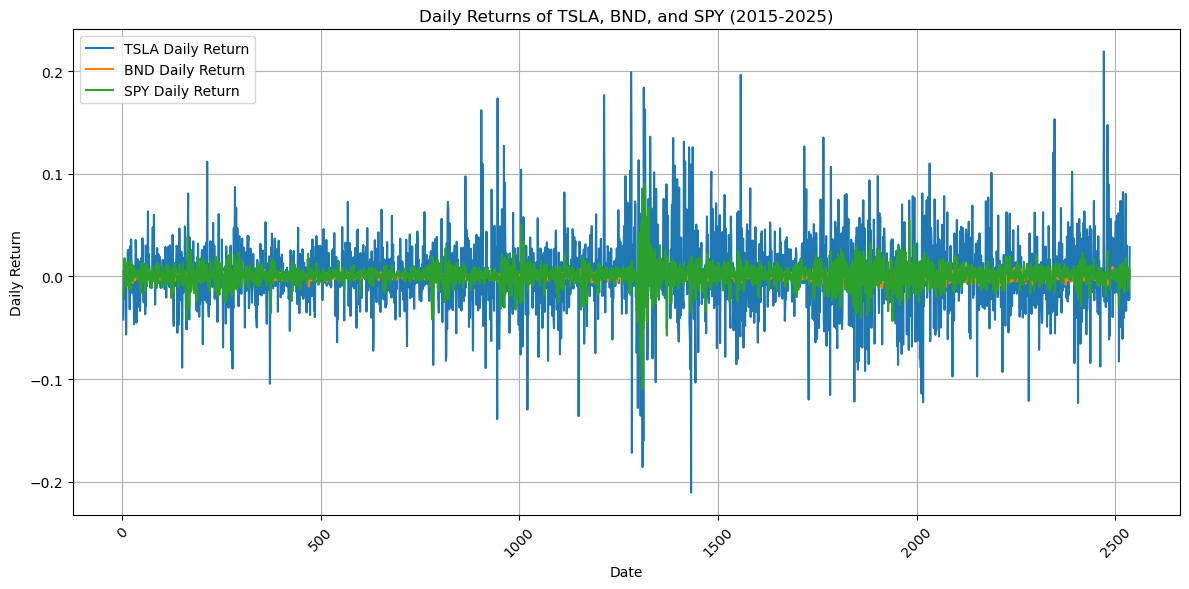


Summary Statistics of Daily Returns:

TSLA:
count    2534.000000
mean        0.001952
std         0.036005
min        -0.210628
25%        -0.016241
50%         0.001260
75%         0.019256
max         0.219190
Name: Daily Return, dtype: float64

BND:
count    2534.000000
mean        0.000062
std         0.003427
min        -0.054385
25%        -0.001527
50%         0.000124
75%         0.001729
max         0.042201
Name: Daily Return, dtype: float64

SPY:
count    2534.000000
mean        0.000557
std         0.011083
min        -0.109424
25%        -0.003703
50%         0.000601
75%         0.005929
max         0.090603
Name: Daily Return, dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# First, convert the 'Close' columns to numeric type
tsla_data['Close'] = pd.to_numeric(tsla_data['Close'], errors='coerce')
bnd_data['Close'] = pd.to_numeric(bnd_data['Close'], errors='coerce')
spy_data['Close'] = pd.to_numeric(spy_data['Close'], errors='coerce')

# Calculate daily returns (percentage change)
tsla_data['Daily Return'] = tsla_data['Close'].pct_change()
bnd_data['Daily Return'] = bnd_data['Close'].pct_change()
spy_data['Daily Return'] = spy_data['Close'].pct_change()

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(tsla_data.index, tsla_data['Daily Return'], label='TSLA Daily Return')
plt.plot(bnd_data.index, bnd_data['Daily Return'], label='BND Daily Return')
plt.plot(spy_data.index, spy_data['Daily Return'], label='SPY Daily Return')

plt.title('Daily Returns of TSLA, BND, and SPY (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print some summary statistics
print("\nSummary Statistics of Daily Returns:")
print("\nTSLA:")
print(tsla_data['Daily Return'].describe())
print("\nBND:")
print(bnd_data['Daily Return'].describe())
print("\nSPY:")
print(spy_data['Daily Return'].describe())

#####  Rolling Mean and Standard Deviation (Volatility)

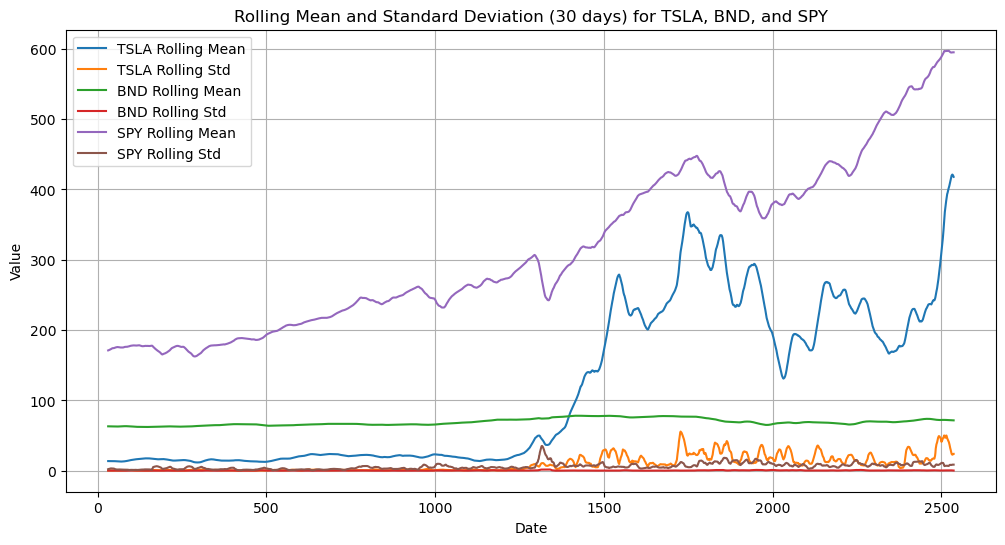

In [20]:
# Calculate rolling mean and standard deviation (for 30 days)
tsla_data['Rolling Mean'] = tsla_data['Close'].rolling(window=30).mean()
tsla_data['Rolling Std'] = tsla_data['Close'].rolling(window=30).std()

bnd_data['Rolling Mean'] = bnd_data['Close'].rolling(window=30).mean()
bnd_data['Rolling Std'] = bnd_data['Close'].rolling(window=30).std()

spy_data['Rolling Mean'] = spy_data['Close'].rolling(window=30).mean()
spy_data['Rolling Std'] = spy_data['Close'].rolling(window=30).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 6))

plt.plot(tsla_data['Rolling Mean'], label='TSLA Rolling Mean')
plt.plot(tsla_data['Rolling Std'], label='TSLA Rolling Std')

plt.plot(bnd_data['Rolling Mean'], label='BND Rolling Mean')
plt.plot(bnd_data['Rolling Std'], label='BND Rolling Std')

plt.plot(spy_data['Rolling Mean'], label='SPY Rolling Mean')
plt.plot(spy_data['Rolling Std'], label='SPY Rolling Std')

plt.title('Rolling Mean and Standard Deviation (30 days) for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

##### Outlier Detection (High/Low Returns)

In [21]:
# Define thresholds for outliers (e.g., 2 standard deviations)
threshold = 2

# Detect high/low returns for each asset
tsla_outliers = tsla_data[tsla_data['Daily Return'].abs() > threshold]
bnd_outliers = bnd_data[bnd_data['Daily Return'].abs() > threshold]
spy_outliers = spy_data[spy_data['Daily Return'].abs() > threshold]

# Show outliers for TSLA
print("TSLA Outliers: ")
print(tsla_outliers[['Daily Return']].head())

# Similarly, print outliers for BND and SPY
print("BND Outliers: ")
print(bnd_outliers[['Daily Return']].head())

print("SPY Outliers: ")
print(spy_outliers[['Daily Return']].head())

TSLA Outliers: 
Empty DataFrame
Columns: [Daily Return]
Index: []
BND Outliers: 
Empty DataFrame
Columns: [Daily Return]
Index: []
SPY Outliers: 
Empty DataFrame
Columns: [Daily Return]
Index: []


##### Seasonality and Trend Decomposition

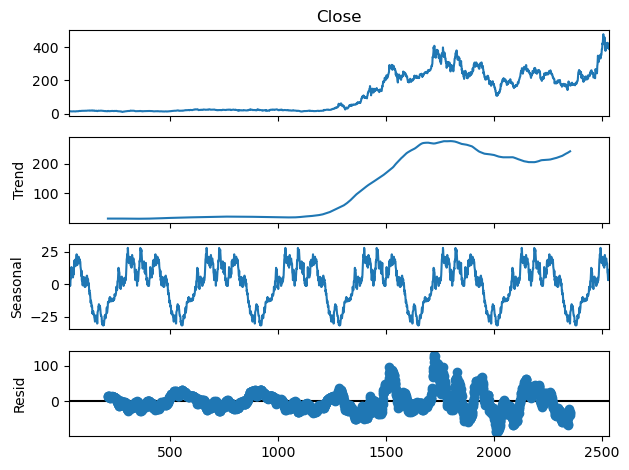

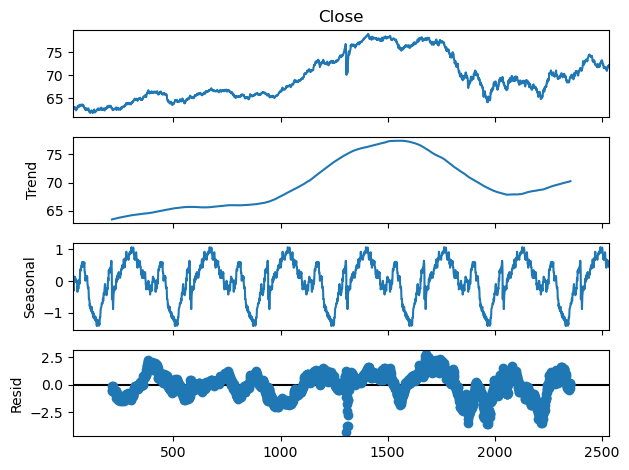

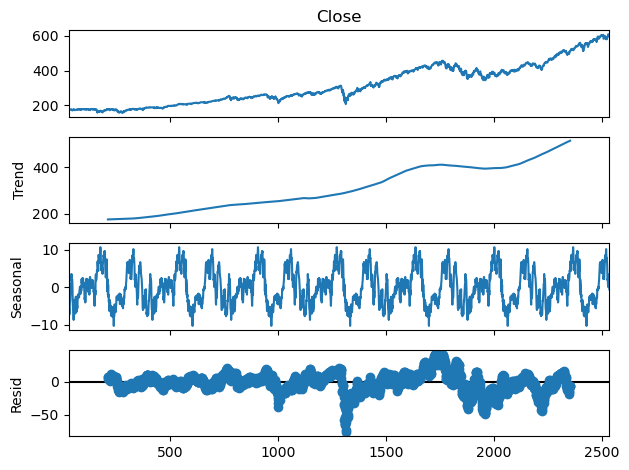

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

tsla_decomposition = seasonal_decompose(tsla_data['Close'], model='additive', period=365)
tsla_decomposition.plot()
plt.show()

bnd_decomposition = seasonal_decompose(bnd_data['Close'], model='additive', period=365)
bnd_decomposition.plot()
plt.show()

spy_decomposition = seasonal_decompose(spy_data['Close'], model='additive', period=365)
spy_decomposition.plot()
plt.show()

# Summary of Key Insights:
	•	Volatility & Risk: TSLA shows higher volatility compared to BND and SPY, reflecting its high-risk, high-reward profile.
	•	Seasonality: The decomposition of the time series data revealed patterns of seasonality for all assets, particularly noticeable in SPY and TSLA.
	•	Outliers: TSLA exhibited more extreme outliers than BND and SPY, indicating higher susceptibility to market events.